<a href="https://colab.research.google.com/github/Sumit189/Medicinal-Plant-Leaf-Classifier/blob/master/Medicinal%20Plant%20Leaf%20Classification%20with%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset

In [1]:
#Downloading Dataset
!wget "http://leafsnap.com/static/dataset/leafsnap-dataset.tar"

--2020-03-31 13:54:21--  http://leafsnap.com/static/dataset/leafsnap-dataset.tar
Resolving leafsnap.com (leafsnap.com)... 128.59.23.133
Connecting to leafsnap.com (leafsnap.com)|128.59.23.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1023416320 (976M) [application/x-tar]
Saving to: ‘leafsnap-dataset.tar’

leafsnap-dataset.ta 100%[===================>] 976.01M  30.0MB/s    in 35s     

2020-03-31 13:54:56 (28.3 MB/s) - ‘leafsnap-dataset.tar’ saved [1023416320/1023416320]



In [2]:
#Extracting Dataset
!tar -xvf /content/leafsnap-dataset.tar

Streaming output truncated to the last 5000 lines.
dataset/segmented/lab/pinus_flexilis/ny1106-02-1.png
dataset/segmented/lab/pinus_flexilis/ny1107-03-1.png
dataset/segmented/lab/pinus_flexilis/ny1105-07-3.png
dataset/segmented/lab/pinus_flexilis/ny1106-07-2.png
dataset/segmented/lab/pinus_flexilis/ny1106-02-3.png
dataset/segmented/lab/pinus_flexilis/ny1105-02-4.png
dataset/segmented/lab/pinus_flexilis/ny1106-08-1.png
dataset/segmented/lab/pinus_flexilis/ny1105-08-2.png
dataset/segmented/lab/pinus_flexilis/ny1105-09-1.png
dataset/segmented/lab/pinus_flexilis/ny1105-11-3.png
dataset/segmented/lab/pinus_flexilis/ny1107-03-2.png
dataset/segmented/lab/pinus_flexilis/ny1107-02-3.png
dataset/segmented/lab/pinus_flexilis/ny1105-02-1.png
dataset/segmented/lab/pinus_flexilis/ny1106-05-4.png
dataset/segmented/lab/pinus_flexilis/ny1106-05-2.png
dataset/segmented/lab/pinus_flexilis/ny1106-04-3.png
dataset/segmented/lab/pinus_flexilis/ny1105-07-4.png
dataset/segmented/lab/pinus_flexilis/ny1106-01-1

In [3]:
!pip install imageio  #imageio is used to read the images of various formats

In [0]:
import os  #os for traversing into the directory for files
import PIL #PIL is used to resize the images, so that the shape of all images will be same
import imageio #imageio is used to read images
import pandas as pd #pandas is used for reading and writing the csv files
import numpy as np #numpy is used for creating input array
import random #random is used for andomizing the inputs
import math #
import shutil #sutil is used to delete unnecessary folders
from tensorflow import keras

In [5]:
#txt file is included with the dataset contains the file_id, path of image, species and source
dataset = pd.read_csv("./leafsnap-dataset-images.txt", sep="\t")
dataset.head()

,file_id,image_path,segmented_path,species,source
0,55497,dataset/images/lab/abies_concolor/ny1157-01-1.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab
1,55498,dataset/images/lab/abies_concolor/ny1157-01-2.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab
2,55499,dataset/images/lab/abies_concolor/ny1157-01-3.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab
3,55500,dataset/images/lab/abies_concolor/ny1157-01-4.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab
4,55501,dataset/images/lab/abies_concolor/ny1157-02-1.jpg,dataset/segmented/lab/abies_concolor/ny1157-02...,Abies concolor,lab


In [7]:
print("Total number of species in the dataset: ",len(dataset.species.unique()))

Total number of species in the dataset:  185


#Extracting all filenames from path 

In [0]:
dataset["filename"] = None
filename_index_in_dataframe = dataset.columns.get_loc("filename")
for i in range(len(dataset)):
    dataset.iloc[i, filename_index_in_dataframe] = os.path.basename(dataset.image_path[i])

In [9]:
dataset.head()

,file_id,image_path,segmented_path,species,source,filename
0,55497,dataset/images/lab/abies_concolor/ny1157-01-1.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab,ny1157-01-1.jpg
1,55498,dataset/images/lab/abies_concolor/ny1157-01-2.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab,ny1157-01-2.jpg
2,55499,dataset/images/lab/abies_concolor/ny1157-01-3.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab,ny1157-01-3.jpg
3,55500,dataset/images/lab/abies_concolor/ny1157-01-4.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab,ny1157-01-4.jpg
4,55501,dataset/images/lab/abies_concolor/ny1157-02-1.jpg,dataset/segmented/lab/abies_concolor/ny1157-02...,Abies concolor,lab,ny1157-02-1.jpg


#Removing Extra Directory 
###We remove 155 directories from our dataset and only conserve 30 Directoies that are present in Plant Medical Records.csv

In [10]:
#Plants Medical Records is csv file that contains the name of 30 medicinal plant and their uses.
df2=pd.read_csv('Plants_Medical_Record.csv')
df2.head()
df2.Species.unique()

array(['Abies concolor', 'Acer campestre', 'Albizia julibrissin',
       'Asimina triloba', 'Betula alleghaniensis', 'Betula jacqemontii',
       'Carpinus betulus', 'Castanea dentata', 'Catalpa bignonioides',
       'Cedrus atlantica', 'Cercis canadensis', 'Chionanthus virginicus',
       'Eucommia ulmoides', 'Fagus grandifolia', 'Ficus carica',
       'Gleditsia triacanthos', 'Larix decidua', 'Magnolia acuminata',
       'Magnolia grandiflora', 'Morus alba', 'Paulownia tomentosa',
       'Populus deltoides', 'Robinia pseudo-acacia', 'Sassafras albidum',
       'Tilia cordata', 'Toona sinensis', 'Tsuga canadensis',
       'Ulmus pumila', 'Ulmus glabra', 'Ulmus rubra'], dtype=object)

In [0]:
names_=df2['Species']

In [12]:
names_.values

array(['Abies concolor', 'Acer campestre', 'Albizia julibrissin',
       'Asimina triloba', 'Betula alleghaniensis', 'Betula jacqemontii',
       'Carpinus betulus', 'Castanea dentata', 'Catalpa bignonioides',
       'Cedrus atlantica', 'Cercis canadensis', 'Chionanthus virginicus',
       'Eucommia ulmoides', 'Fagus grandifolia', 'Ficus carica',
       'Gleditsia triacanthos', 'Larix decidua', 'Magnolia acuminata',
       'Magnolia grandiflora', 'Morus alba', 'Paulownia tomentosa',
       'Populus deltoides', 'Robinia pseudo-acacia', 'Sassafras albidum',
       'Tilia cordata', 'Toona sinensis', 'Tsuga canadensis',
       'Ulmus pumila', 'Ulmus glabra', 'Ulmus rubra'], dtype=object)

In [0]:
#Creating a new dataframe that holds the data of 30 medicinal plants that we use in this project
new_df=dataset[   (dataset.species==names_[0])| (dataset.species==names_[1])
                | (dataset.species==names_[2])| (dataset.species==names_[3])
                | (dataset.species==names_[4])| (dataset.species==names_[5])
                | (dataset.species==names_[6])| (dataset.species==names_[7])
                | (dataset.species==names_[8])| (dataset.species==names_[9])
                | (dataset.species==names_[10])| (dataset.species==names_[11])
                | (dataset.species==names_[12])| (dataset.species==names_[13])
                | (dataset.species==names_[14])| (dataset.species==names_[15])
                | (dataset.species==names_[16])| (dataset.species==names_[17])
                | (dataset.species==names_[18])| (dataset.species==names_[19])
                | (dataset.species==names_[20])| (dataset.species==names_[21])
                | (dataset.species==names_[22])| (dataset.species==names_[23])
                | (dataset.species==names_[24])| (dataset.species==names_[25])
                | (dataset.species==names_[26])| (dataset.species==names_[27])
                | (dataset.species==names_[28])| (dataset.species==names_[29])
                ]

In [0]:
dataset=new_df

In [0]:
to_conserve=new_df.species.unique()
for i in range(len(to_conserve)):
  to_conserve[i]=to_conserve[i].replace(' ','_').lower()

In [16]:
to_conserve

array(['abies_concolor', 'acer_campestre', 'asimina_triloba',
       'betula_jacqemontii', 'carpinus_betulus', 'castanea_dentata',
       'cedrus_atlantica', 'cercis_canadensis', 'eucommia_ulmoides',
       'fagus_grandifolia', 'gleditsia_triacanthos', 'larix_decidua',
       'magnolia_acuminata', 'magnolia_grandiflora', 'morus_alba',
       'paulownia_tomentosa', 'populus_deltoides',
       'robinia_pseudo-acacia', 'sassafras_albidum', 'tilia_cordata',
       'toona_sinensis', 'tsuga_canadensis', 'ulmus_glabra',
       'ulmus_pumila', 'albizia_julibrissin', 'betula_alleghaniensis',
       'catalpa_bignonioides', 'chionanthus_virginicus', 'ficus_carica',
       'ulmus_rubra'], dtype=object)

In [17]:
def remove_extra(to_remove_dir):
  all_dir=(os.listdir('/content/dataset/'+to_remove_dir))
  flag=0
  count=0
  directory_name='/content/dataset/'+to_remove_dir
  for i in all_dir:
    for j in to_conserve:
      flag=0
      if i==j:
        flag=1
        break
    if flag!=1:
      t_remove=directory_name+i+'/'
      shutil.rmtree(t_remove)
      print("Removed "+t_remove)

remove_extra('images/field/')
remove_extra('images/lab/')
remove_extra('segmented/field/')
remove_extra('segmented/lab/')

Removed /content/dataset/images/field/crataegus_phaenopyrum/
Removed /content/dataset/images/field/platanus_occidentalis/
Removed /content/dataset/images/field/quercus_coccinea/
Removed /content/dataset/images/field/carya_ovata/
Removed /content/dataset/images/field/crataegus_viridis/
Removed /content/dataset/images/field/crataegus_laevigata/
Removed /content/dataset/images/field/quercus_virginiana/
Removed /content/dataset/images/field/carpinus_caroliniana/
Removed /content/dataset/images/field/quercus_shumardii/
Removed /content/dataset/images/field/pseudolarix_amabilis/
Removed /content/dataset/images/field/quercus_nigra/
Removed /content/dataset/images/field/prunus_pensylvanica/
Removed /content/dataset/images/field/staphylea_trifolia/
Removed /content/dataset/images/field/evodia_daniellii/
Removed /content/dataset/images/field/malus_pumila/
Removed /content/dataset/images/field/acer_griseum/
Removed /content/dataset/images/field/acer_rubrum/
Removed /content/dataset/images/field/q

#Resize all images into 64x64 pixels

###Resizing the images are beneficial for the CNN becuase it learn more features from the small sized image.

In [0]:
#Creating new resized directory which will contain the resized images.
!rm -rf resized
!mkdir resized

In [0]:
def resizer(input_, filename_, output_dir="", size=(1024,768)):
  outfile = os.path.splitext(filename_)[0] #extracting filenames
  ext = os.path.splitext(input_)[1] #extracting the extension of images .jpg,.png,etc.
  
  if input_ != outfile: 
    if not os.path.isfile(output_dir + "/" + outfile + ext): 
      try :
        im = PIL.Image.open(input_)
        im = im.resize(size, PIL.Image.ANTIALIAS)  #resizing image
        im.save(output_dir + "/" + outfile + ext) #saving new resized image
      except IOError:
        print("Can'nt open File")

output_dir = "/content/resized/"
size = (64, 64)
filenames_dir = list(dataset["image_path"])
filenames = list(dataset["filename"])
            
for i in range(len(filenames)):
  resizer(filenames_dir[i], filenames[i], output_dir=output_dir, size=size)

#Creating Target 

In [20]:
dataset["target"] = None
#index of new column
index_labels_integer = dataset.columns.get_loc("target")
#index of species column
index_species = dataset.columns.get_loc("species")
counter = 0 
for i in range(len(dataset)):
    if i == 0:
        dataset.iloc[i, index_labels_integer] = counter 
    if i > 0:
        if dataset.iloc[i-1, index_species] == dataset.iloc[i, index_species]:
            dataset.iloc[i, index_labels_integer] = counter
        else:
            counter += 1
            dataset.iloc[i, index_labels_integer] = counter
dataset.tail()

,file_id,image_path,segmented_path,species,source,filename,target
30861,83817,dataset/images/field/ulmus_rubra/1300222828248...,dataset/segmented/field/ulmus_rubra/1300222828...,Ulmus rubra,field,13002228282488.jpg,29
30862,83818,dataset/images/field/ulmus_rubra/1300222828261...,dataset/segmented/field/ulmus_rubra/1300222828...,Ulmus rubra,field,13002228282613.jpg,29
30863,83819,dataset/images/field/ulmus_rubra/1300222828265...,dataset/segmented/field/ulmus_rubra/1300222828...,Ulmus rubra,field,13002228282655.jpg,29
30864,83820,dataset/images/field/ulmus_rubra/1300222828617...,dataset/segmented/field/ulmus_rubra/1300222828...,Ulmus rubra,field,13002228286176.jpg,29
30865,83821,dataset/images/field/ulmus_rubra/1300222828044...,dataset/segmented/field/ulmus_rubra/1300222828...,Ulmus rubra,field,13002228280448.jpg,29


#Preprocessing

###Creating a vector that holds the pixel array of the images.

In [0]:
vectors = []
for i in range(len(dataset)):
    file = "resized" + "/" + dataset.iloc[i, filename_index_in_dataframe]
    #read as rgb array
    img = imageio.imread(file)
    vectors.append(img)

###Shuffling all the datatset, so that the data should not get memorized by our classifier

In [0]:
#relevant variables
label = dataset["species"]
source = dataset["source"]
target = dataset["target"]
vectors = vectors
filename = dataset["filename"]
path = dataset["image_path"]

#randomization
allinfo = list(zip(label, source, target, vectors, filename, path)) 
random.shuffle(allinfo) #shuffle
label, source, target, vectors, filename, path = zip(*allinfo) #decompose again
dataset = pd.DataFrame({"filename":filename, "label":label, "source":source, "target":target, "path":path}) #store picture information in randomized order
dataset.to_csv("dataset_rand.csv", index=False)

###Stacking all the image numpy array into one unit and assigning it to X.
###Assiging the target to Y

In [0]:
X = np.stack((vectors))
Y = np.asarray(target)

###Scaling the inputs and Converting the Target into OneHot Encoding

In [24]:
X = X/255
Y_one_hot = keras.utils.to_categorical(Y, num_classes=30)
print(Y.shape, Y_one_hot.shape)

(5248,) (5248, 30)


###Reading the randomized/shuffled dataset

In [0]:
dataset_rand = pd.read_csv("dataset_rand.csv")

#Model Creation and Training
###Importing all required libraries for creating a Deep Learning Model

In [0]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint

###Splitting data for train, test and validation set

In [27]:
split_train = 0.8 #train 0.8, validate 0.1, test 0.1
split_val = 0.9
index_train = int(split_train*len(X))
index_val = int(split_val*len(X))

X_train = X[:index_train]
X_val = X[index_train:index_val]
X_test = X[index_val:]

Y_train = Y_one_hot[:index_train]
Y_val = Y_one_hot[index_train:index_val]
Y_test = Y_one_hot[index_val:]

#for later predictions on test set
target_test = dataset_rand.loc[index_val:len(X), "target"]
labels_test = dataset_rand.loc[index_val:len(X), "label"]
filenames_test = dataset_rand.loc[index_val:len(X), "filename"]
source_test = dataset_rand.loc[index_val:len(X), "source"]
path_test = dataset_rand.loc[index_val:len(X), "path"]

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(4198, 64, 64, 3) (525, 64, 64, 3) (525, 64, 64, 3) (4198, 30) (525, 30) (525, 30)


#CNN
###Feature extraction from the images in deep learning is performed with the Convolutional Neural CNN (Convolutional Neural Networks) uses the same process as the used in Dense Networks that is provided by Multi-Layer Perceptron. Dense Layer is different from the CNN (Convolutional Neural Network) Layers because its CNN uses convolutions whereas the Dense Layer uses Matrix Multiplication to form an output.


In [0]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]) #(64, 64, 3)
num_classes = 30

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=input_shape)) #Convolutional Layer with 5x5 filter
model.add(Activation('relu')) #Rectified linear unit (0 for -ve values)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) #Mapooling layer with pool size 2x2
model.add(Conv2D(64, (5, 5))) #Convolutional Layer with 5x5 filter
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.7)) #Dropout Layer helps to avoid over fitting 
model.add(Flatten()) #converting the 3d array into single dimension array
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(rate=0.7))
model.add(Dense(num_classes, activation='softmax')) #Softmax layer to get 30 outputs

'''Adam optimizer is an adaptive learning rate, according to the loss it self adjusts to provide better accuracy,
   Crossentropy loss is used for classification tasks.
'''
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
best_model_file = "PlantClassifier.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_val, Y_val), callbacks=[best_model])
print('Traing finished.')

model = load_model(best_model_file)

Epoch 1/100
66/66 [==============================] - ETA: 0s - loss: 2.8215 - accuracy: 0.2039
Epoch 00001: val_loss improved from inf to 1.61901, saving model to PlantClassifier.h5
66/66 [==============================] - 2s 23ms/step - loss: 2.8215 - accuracy: 0.2039 - val_loss: 1.6190 - val_accuracy: 0.5505
Epoch 2/100
64/66 [============================>.] - ETA: 0s - loss: 1.6429 - accuracy: 0.5088
Epoch 00002: val_loss improved from 1.61901 to 1.03491, saving model to PlantClassifier.h5
66/66 [==============================] - 1s 19ms/step - loss: 1.6406 - accuracy: 0.5088 - val_loss: 1.0349 - val_accuracy: 0.7029
Epoch 3/100
63/66 [===========================>..] - ETA: 0s - loss: 1.1578 - accuracy: 0.6364
Epoch 00003: val_loss improved from 1.03491 to 0.72573, saving model to PlantClassifier.h5
66/66 [==============================] - 1s 18ms/step - loss: 1.1508 - accuracy: 0.6391 - val_loss: 0.7257 - val_accuracy: 0.7848
Epoch 4/100
63/66 [===========================>..] - ETA

###Evaluating the performance of the classifier

In [30]:
model.evaluate(X_test, Y_test)

17/17 [==============================] - 0s 4ms/step - loss: 0.2965 - accuracy: 0.9124


[0.2964828312397003, 0.9123809337615967]

#Prediction

In [31]:
pred = model.predict_classes(X_test)
predictions= pd.DataFrame({'prediction': pred, 'target': target_test, 'label': labels_test})
#order columns
predictions = predictions[['prediction', 'target', 'label']]
predictions.head()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,prediction,target,label
4723,2,2,Asimina triloba
4724,27,27,Chionanthus virginicus
4725,22,22,Ulmus glabra
4726,11,11,Larix decidua
4727,2,8,Eucommia ulmoides


#Accuracy and Loss Plots

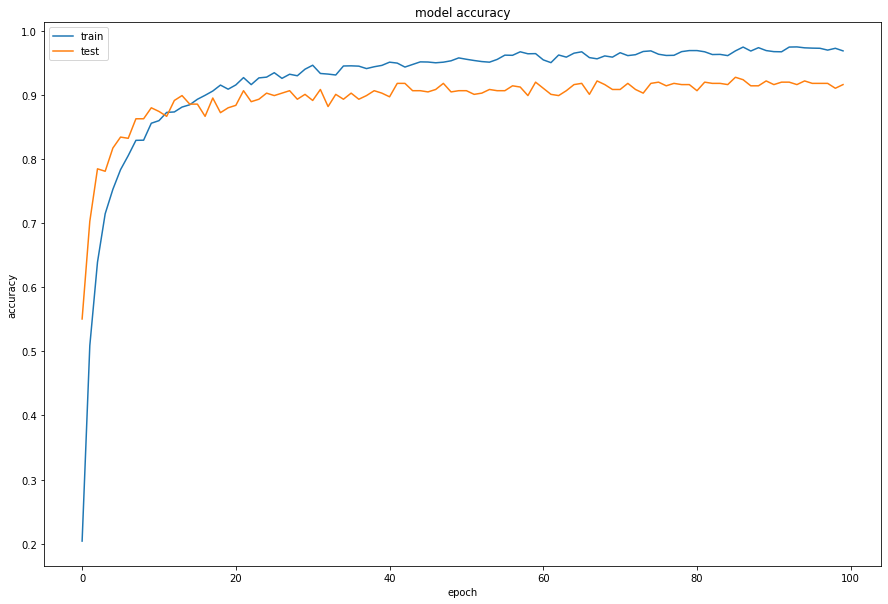

In [32]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

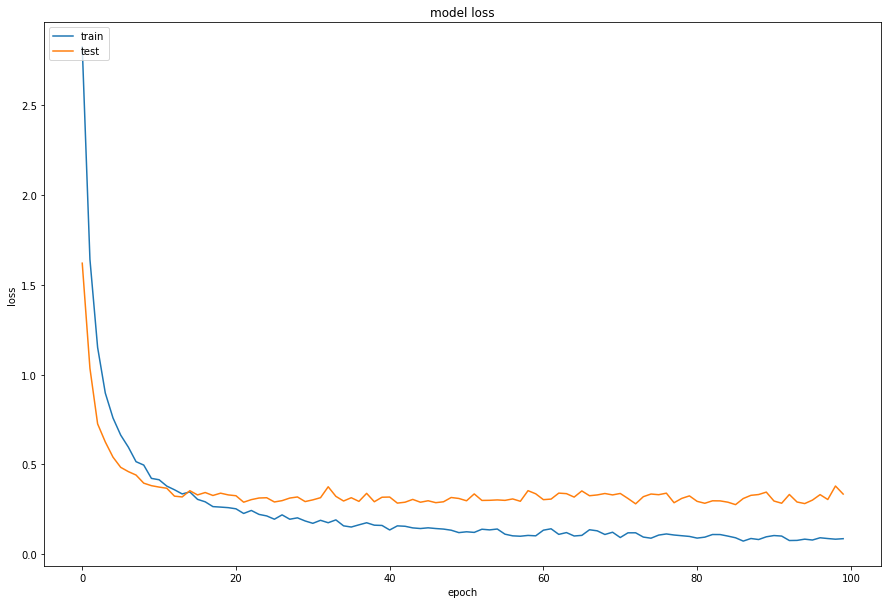

In [33]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()